<a href="https://colab.research.google.com/github/janduplessis883/Univariate-Linear-Regression-Exercise/blob/main/Univariate_Linear_Regression_HEAD_SIZE_%2B_BRAIN_WEIGHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate Linear Regression** - Brain_Weight & Head_Size
Jan du Plessis - *Data Science #1052*<BR>
Dataset: `jan-datasets/brainweight.csv`


### Data Prep

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
 
# Set style to 'seaborn' - high resolution graphs
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

In [107]:
df = pd.read_csv('/content/brainweight.csv')
df.head()

,GENDER,AGE_RANGE,HEAD_SIZE,BRAIN_WEIGHT
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [108]:
df = df.drop(['GENDER', 'AGE_RANGE'], axis=1)
df.head()

,HEAD_SIZE,BRAIN_WEIGHT
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [136]:
df = df.replace(0, np.nan)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HEAD_SIZE     237 non-null    int64
 1   BRAIN_WEIGHT  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


## **Exploratory Analysis**

In [111]:
df.describe()

,HEAD_SIZE,BRAIN_WEIGHT
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


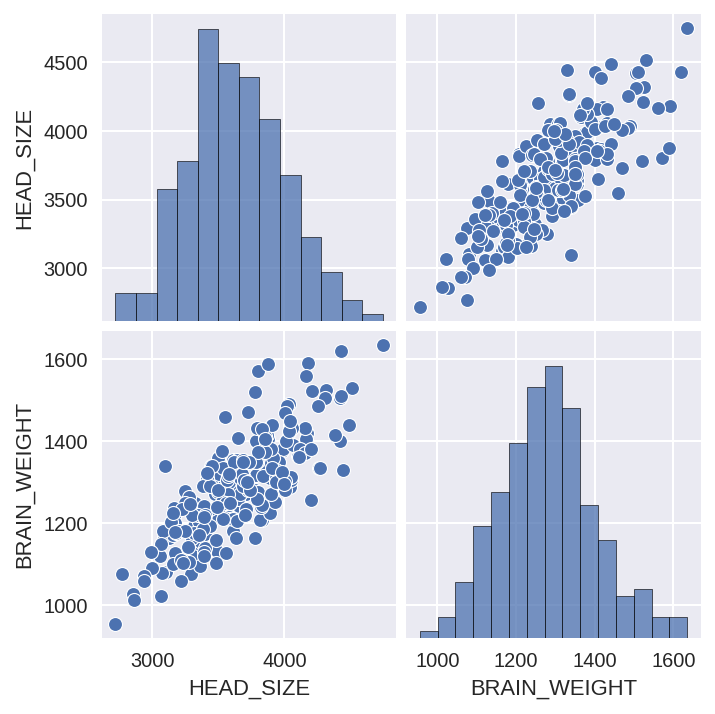

In [112]:
sns.pairplot(df)

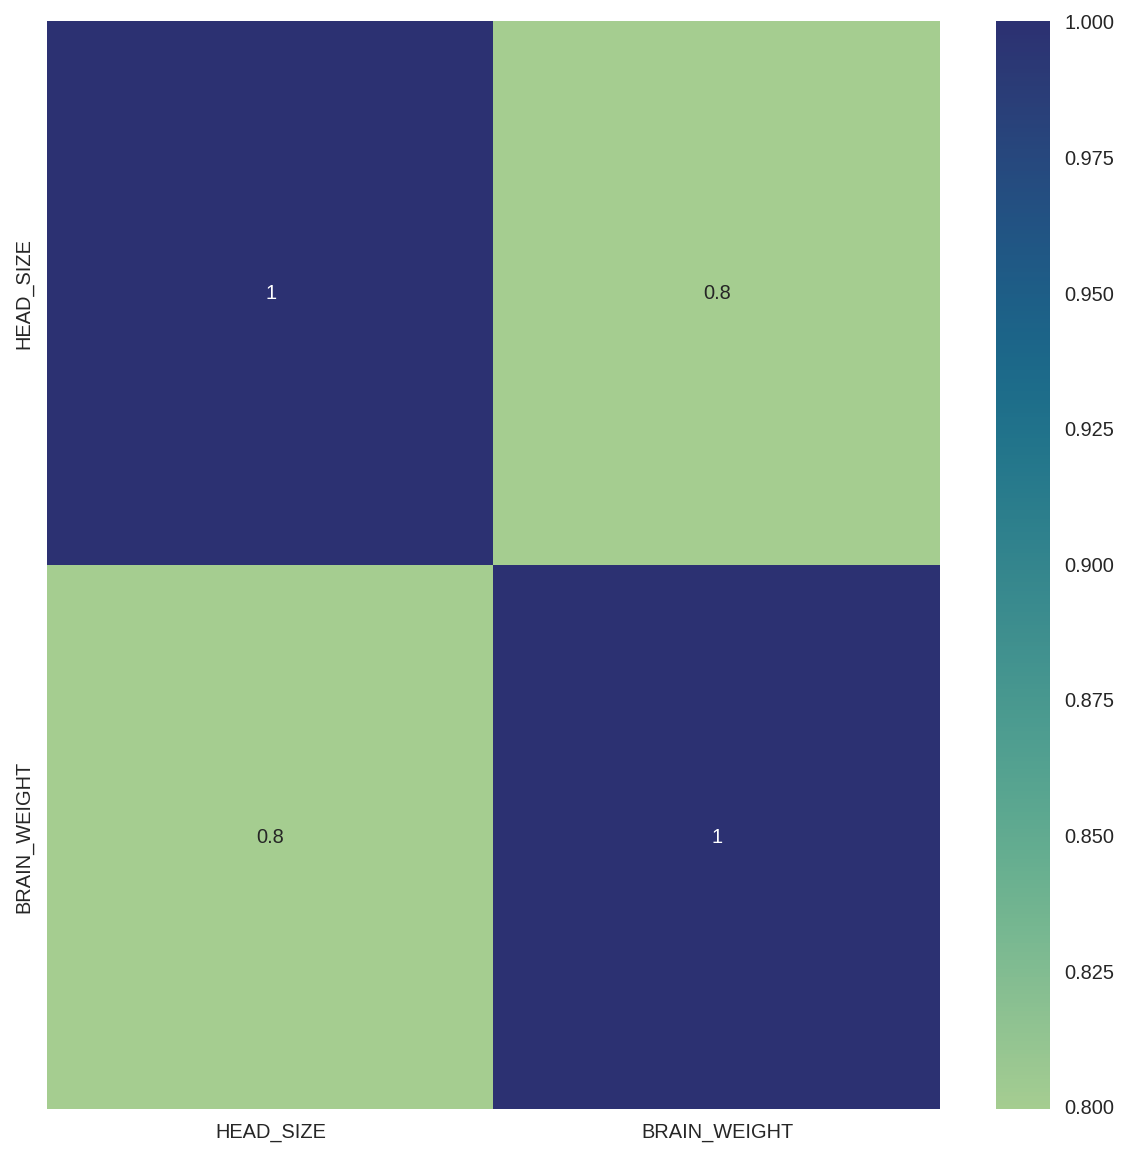

In [113]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (10, 10))

sns.heatmap(
    df.corr(), 
    cmap = 'crest', 
    annot = True, 
    annot_kws = {"size": 10}
)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


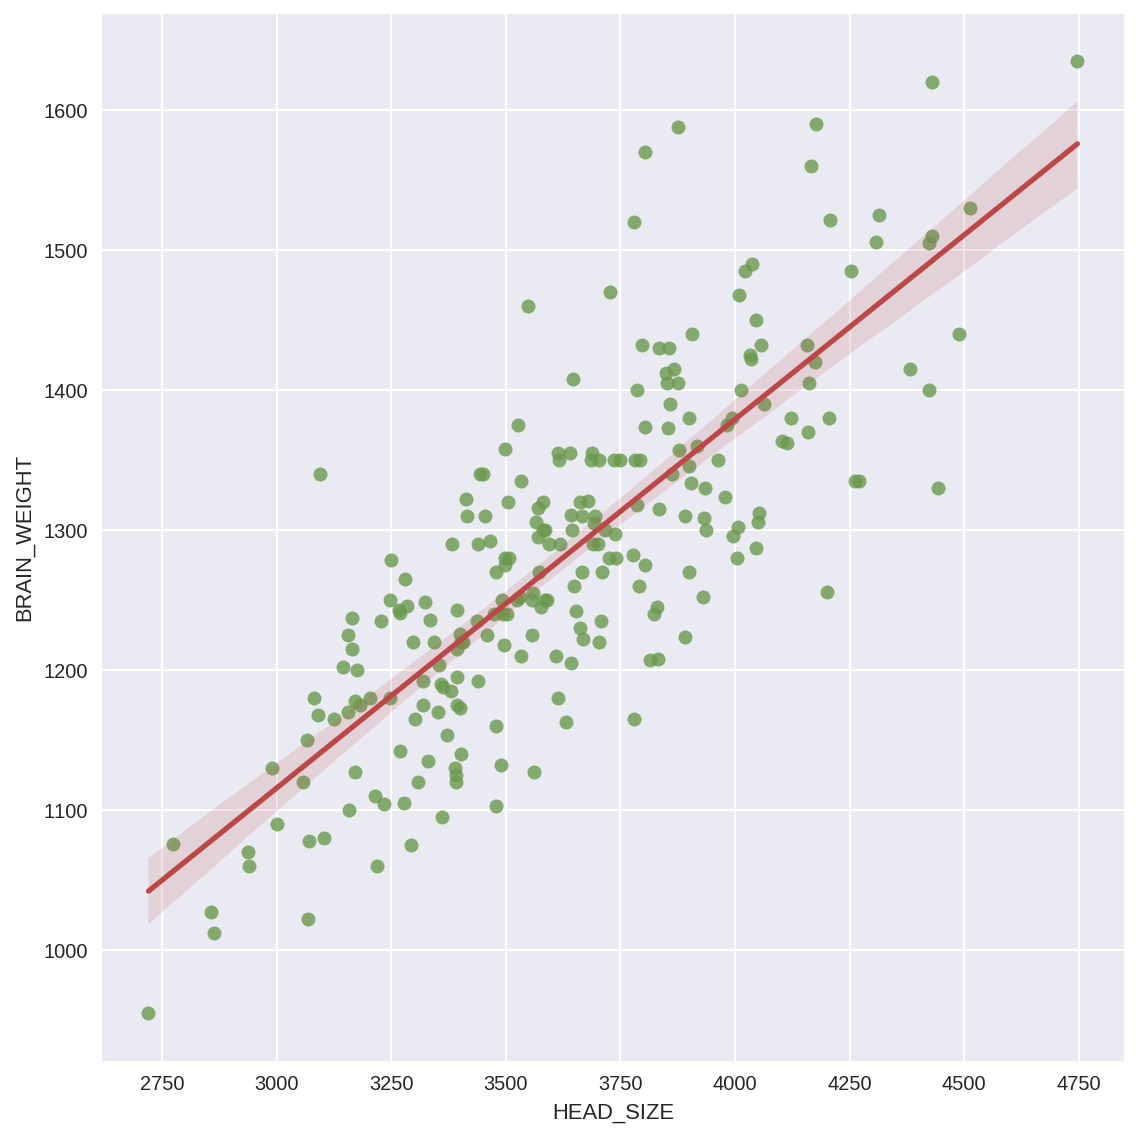

In [114]:
sns.lmplot(data=df, y='BRAIN_WEIGHT', x='HEAD_SIZE', scatter_kws={"color": "#6a994e"}, size=8, line_kws={"color": "#bc4749"})


# Linear Regression - Dep Variable: **BRAIN_WEIGHT**

In [115]:
import statsmodels.formula.api as smf

model1 = smf.ols('BRAIN_WEIGHT ~ HEAD_SIZE', data=df).fit()


In [116]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           BRAIN_WEIGHT   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.96e-54
Time:                        13:41:27   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0


**Condition number** depends on the underlying norm. However, regardless of the norm, it is always greater or equal to 1. If it is close to one, the matrix is well conditioned which means its inverse can be computed with good accuracy. If the condition number is large, then the matrix is said to be ill-conditioned.<BR>
**R-squared** is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.<BR>

The **t-value** measures the size of the difference relative to the variation in your sample data. Put another way, T is simply the calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis.<BR>
The **Pr(>|t|) column** represents the p-value associated with the value in the t value column.

If the **p-value** is less than a certain significance level (e.g. α = .05) then the predictor variable is said to have a statistically significant relationship with the response variable in the model.<BR>
**P values and coefficients** in regression analysis work together to tell you which relationships in your model are statistically significant and the nature of those relationships. The linear regression coefficients describe the mathematical relationship between each independent variable and the dependent variable. The p values for the coefficients indicate whether these relationships are statistically significant.<BR>

The **omnibus test** is a likelihood-ratio chi-square test of the current model versus the null (in this case, intercept) model. The significance value of less than 0.05 indicates that the current model outperforms the null model.<BR><BR>

Image result for linear regression **f statistic**
Summary. f-statistics is a statistic used to test the significance of regression coefficients in linear regression models. f-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.<BR>
**Kurtosis** is a measure of the combined weight of a distribution's tails relative to the center of the distribution. When a set of approximately normal data is graphed via a histogram, it shows a bell peak and most data within three standard deviations (plus or minus) of the mean. However, when high kurtosis is present, the tails extend farther than the three standard deviations of the normal bell-curved distribution.<BR><BR>
**Types of Kurtosis**<BR>
There are three categories of kurtosis that can be displayed by a set of data. All measures of kurtosis are compared against a standard normal distribution, or bell curve.

**`Meoskurtic (kurtosis = 3.0)`**
The first category of kurtosis is a mesokurtic distribution. This distribution has a kurtosis statistic similar to that of the normal distribution, meaning the extreme value characteristic of the distribution is similar to that of a normal distribution.

**`Leptokurtic (kurtosis > 3.0)`**
The second category is a leptokurtic distribution. Any distribution that is leptokurtic displays greater kurtosis than a mesokurtic distribution. Characteristics of this distribution is one with long tails (outliers.) The prefix of "lepto-" means "skinny," making the shape of a leptokurtic distribution easier to remember. The "skinniness" of a leptokurtic distribution is a consequence of the outliers, which stretch the horizontal axis of the histogram graph, making the bulk of the data appear in a narrow ("skinny") vertical range.

Thus leptokurtic distributions are sometimes characterized as "concentrated toward the mean," but the more relevant issue (especially for investors) is there are occasional extreme outliers that cause this "concentration" appearance. Examples of leptokurtic distributions are the T-distributions with small degrees of freedom.

 While a leptokurtic distribution may be "skinny" in the center, it also features "fat tails".<BR>
**`Platykurtic (kurtosis < 3.0)`**
The final type of distribution is a platykurtic distribution. These types of distributions have short tails (paucity of outliers.) The prefix of "platy-" means "broad," and it is meant to describe a short and broad-looking peak, but this is an historical error. Uniform distributions are platykurtic and have broad peaks, but the beta (.5,1) distribution is also platykurtic and has an infinitely pointy peak.

The reason both these distributions are platykurtic is their extreme values are less than that of the normal distribution. For investors, platykurtic return distributions are stable and predictable, in the sense that there will rarely (if ever) be extreme (outlier) returns.

In [135]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BRAIN_WEIGHT   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.96e-54
Time:                        13:50:08   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.000     232.701     418.446
HEAD_SIZE      0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

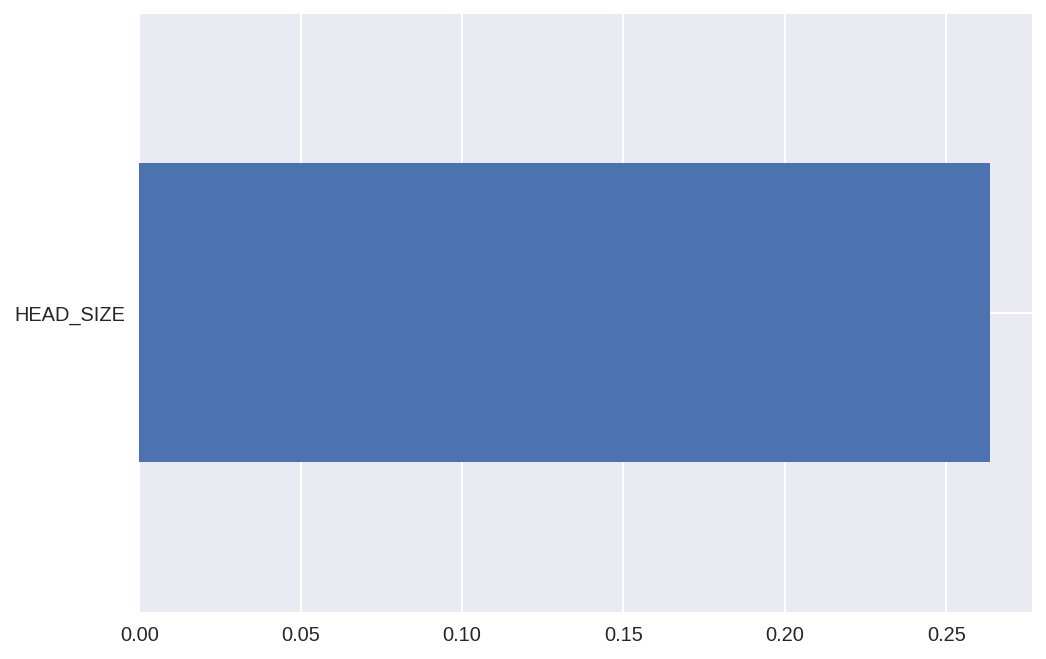

In [117]:
model1.params[1:].sort_values().plot(kind='barh')

In [127]:
predicted_BRAIN_WEIGHT = model1.predict(df.HEAD_SIZE)
residuals = predicted_BRAIN_WEIGHT - df.BRAIN_WEIGHT
print(residuals)

0      -15.833399
1       13.272292
2      113.045837
3       38.546036
4     -164.082228
          ...    
232     62.235318
233      4.652599
234     73.240476
235     38.588567
236     98.862311
Length: 237, dtype: float64


In [119]:
rmse = (residuals**2).mean()**0.5
rmse

72.1206213783709

Text(0.5, 1.0, 'Residuals Density Plot')

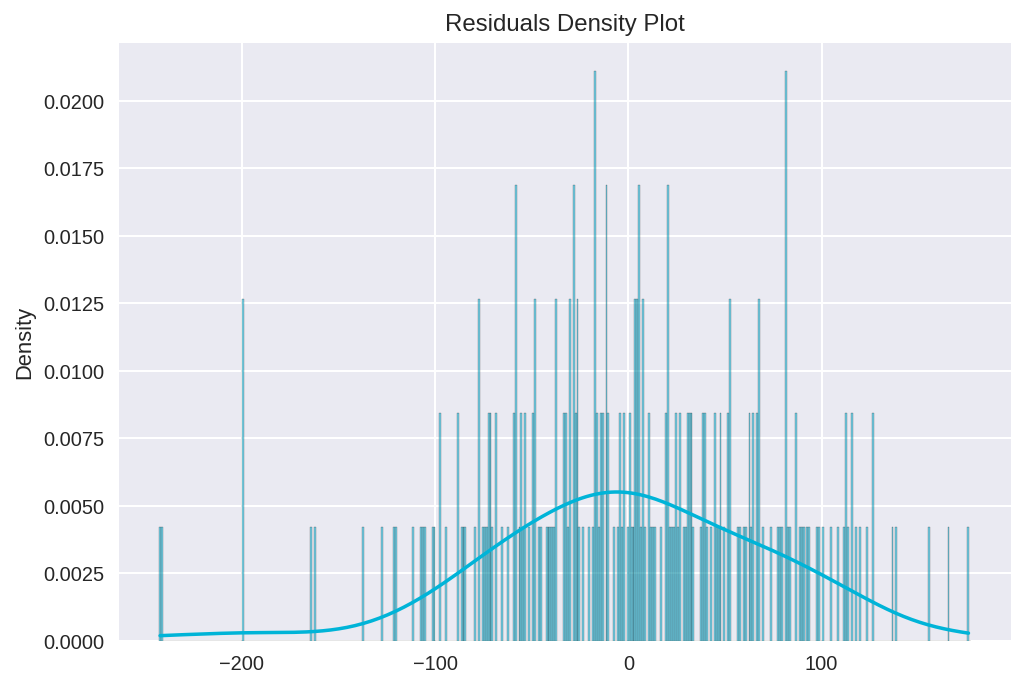

In [131]:
sns.histplot(residuals, kde=True, stat='density', discrete=True, color='#00b4d8', bins=100)
plt.title('Residuals Density Plot')

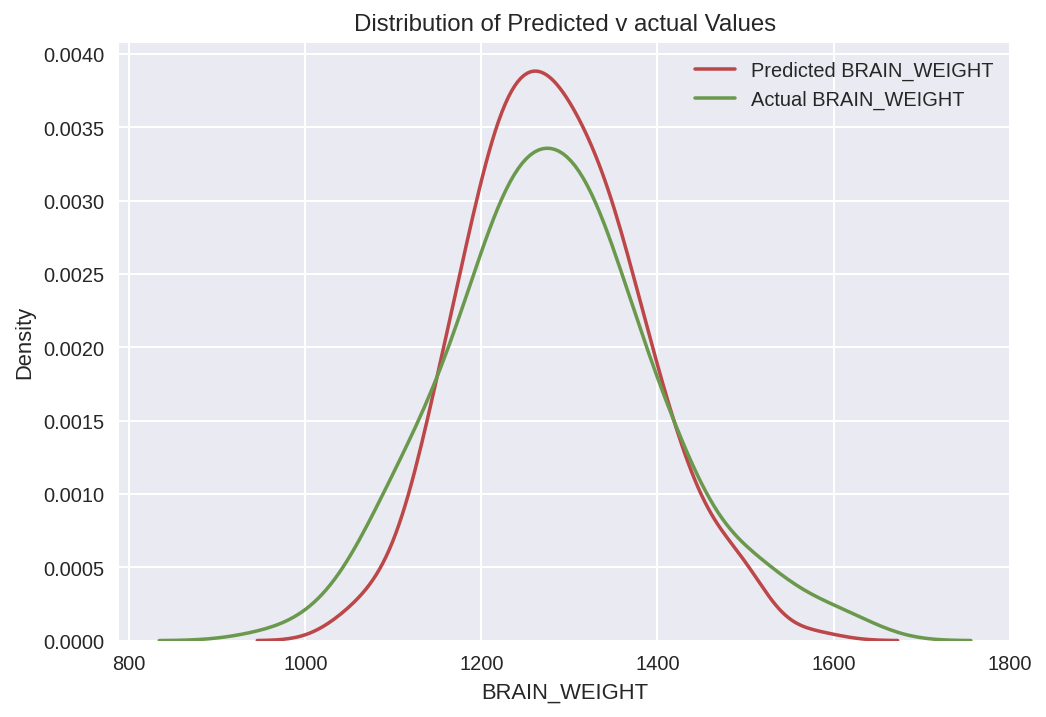

In [134]:
sns.kdeplot(predicted_BRAIN_WEIGHT, label='Predicted BRAIN_WEIGHT', color='#bc4749')
sns.kdeplot(df.BRAIN_WEIGHT, label = 'Actual BRAIN_WEIGHT', color='#6a994e')
plt.title('Distribution of Predicted v actual Values')
plt.legend()